In [1]:
import sys
import os
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
os.chdir('c:\\Users\\Danie\\OneDrive\\Documents\\Coding\\pysystemtrade\\pysystemtrade\\examples\\introduction')
# Add the parent directory of pysystemtrade to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

In [4]:
# stir = ["SOFR", "EURIBOR", "FED", "SONIA3", "BB3M"]
stir = ["SOFR", "EURIBOR", "FED"]
# gov = ['US10', 'BTP', 'BUND', 'GILT', 'OAT', 'JGB']
gov = ['US10', 'GILT', 'JGB']

In [2]:
# Filter the results to a specific date range
start_date = '2002-01-02'
end_date = '2019-12-31'

In [3]:
import logging

# Set logging level to INFO to suppress DEBUG messages
logging.getLogger().setLevel(logging.INFO)

# Import systemtest
from systems.dt.systemtest import systemtest
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData

# Initialize the data
data = csvFuturesSimData()

# Create and run the system with gov instruments
my_system = systemtest(
    data=data,
    start_date=start_date, 
    end_date=end_date
)

Configuring sim logging
2025-02-24 18:46:35 DEBUG config {'type': 'config', 'stage': 'config'} Adding config defaults
Private configuration private/private_config.yaml does not exist; no problem if running in sim mode


2025-02-24 18:39:39 INFO base_system {'stage': 'accounts'} Calculating pandl for portfolio
2025-02-24 18:39:39 INFO base_system {'stage': 'portfolio'} Calculating instrument weights
2025-02-24 18:39:43 INFO base_system {'stage': 'portfolio'} Using fixed diversification multiplier 1.000000
0.474468997430351
index
2024-03-22    2.164919
2024-03-25    2.177387
2024-03-26    2.218711
2024-03-27    2.238549
2024-03-28    2.273406
Freq: B, dtype: float64


<Axes: >

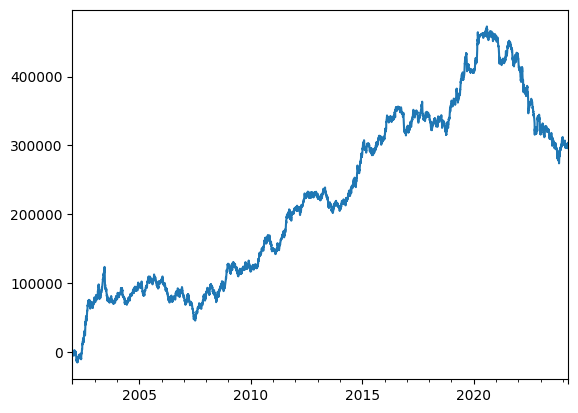

In [7]:
# View portfolio performance
print(my_system.accounts.portfolio().sharpe())

# Look at positions for a specific instrument
print(my_system.portfolio.get_notional_position("US10").tail())

# Plot cumulative returns
my_system.accounts.portfolio().curve().plot()

In [8]:
print("Portfolio Sharpe Ratio:", my_system.accounts.portfolio().sharpe())

Portfolio Sharpe Ratio: 0.474468997430351


In [7]:
portfolio = my_system.accounts.portfolio()

2025-02-24 18:47:19 INFO base_system {'stage': 'accounts'} Calculating pandl for portfolio
2025-02-24 18:47:19 DEBUG base_system {'stage': 'positionSize', 'instrument_code': 'US10'} Getting vol target
2025-02-24 18:47:19 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'EURIBOR'} Calculating pandl for instrument for EURIBOR
2025-02-24 18:47:19 DEBUG base_system {'stage': 'portfolio', 'instrument_code': 'EURIBOR'} Calculating buffers for EURIBOR
2025-02-24 18:47:19 DEBUG base_system {'stage': 'portfolio', 'instrument_code': 'EURIBOR'} Calculating forecast method buffers for EURIBOR
2025-02-24 18:47:19 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'EURIBOR'} Calculating buffered positions
2025-02-24 18:47:19 DEBUG base_system {'stage': 'accounts', 'instrument_code': 'EURIBOR'} Calculating pandl for instrument for EURIBOR
2025-02-24 18:47:19 DEBUG base_system {'stage': 'rawdata', 'instrument_code': 'EURIBOR'} Calculating daily prices for EURIBOR
2025-02-24 18:47:20 

In [8]:
portfolio.percent.stats()
portfolio.percent.curve()


2002-01-02     0.000000
2002-01-03     0.000000
2002-01-04     0.000000
2002-01-07     0.000000
2002-01-08     0.000000
                ...    
2024-03-25    78.632245
2024-03-26    78.910250
2024-03-27    80.356091
2024-03-28    79.774887
2024-03-29    79.774887
Freq: B, Length: 5803, dtype: float64

In [9]:
# Get account statistics for the chapter 15 system
portfolio.percent.stats()

[[('min', '-9.487'),
  ('max', '12.79'),
  ('median', '0.01209'),
  ('mean', '0.01375'),
  ('std', '1.735'),
  ('skew', '0.04833'),
  ('ann_mean', '3.519'),
  ('ann_std', '27.77'),
  ('sharpe', '0.1267'),
  ('sortino', '0.1896'),
  ('avg_drawdown', '-43.98'),
  ('time_in_drawdown', '0.9598'),
  ('calmar', '0.01557'),
  ('avg_return_to_drawdown', '0.08003'),
  ('avg_loss', '-1.307'),
  ('avg_gain', '1.296'),
  ('gaintolossratio', '0.9911'),
  ('profitfactor', '1.022'),
  ('hitrate', '0.5076'),
  ('t_stat', '0.6035'),
  ('p_value', '0.5462')],
 ('You can also plot / print:',
  ['rolling_ann_std', 'drawdown', 'curve', 'percent'])]

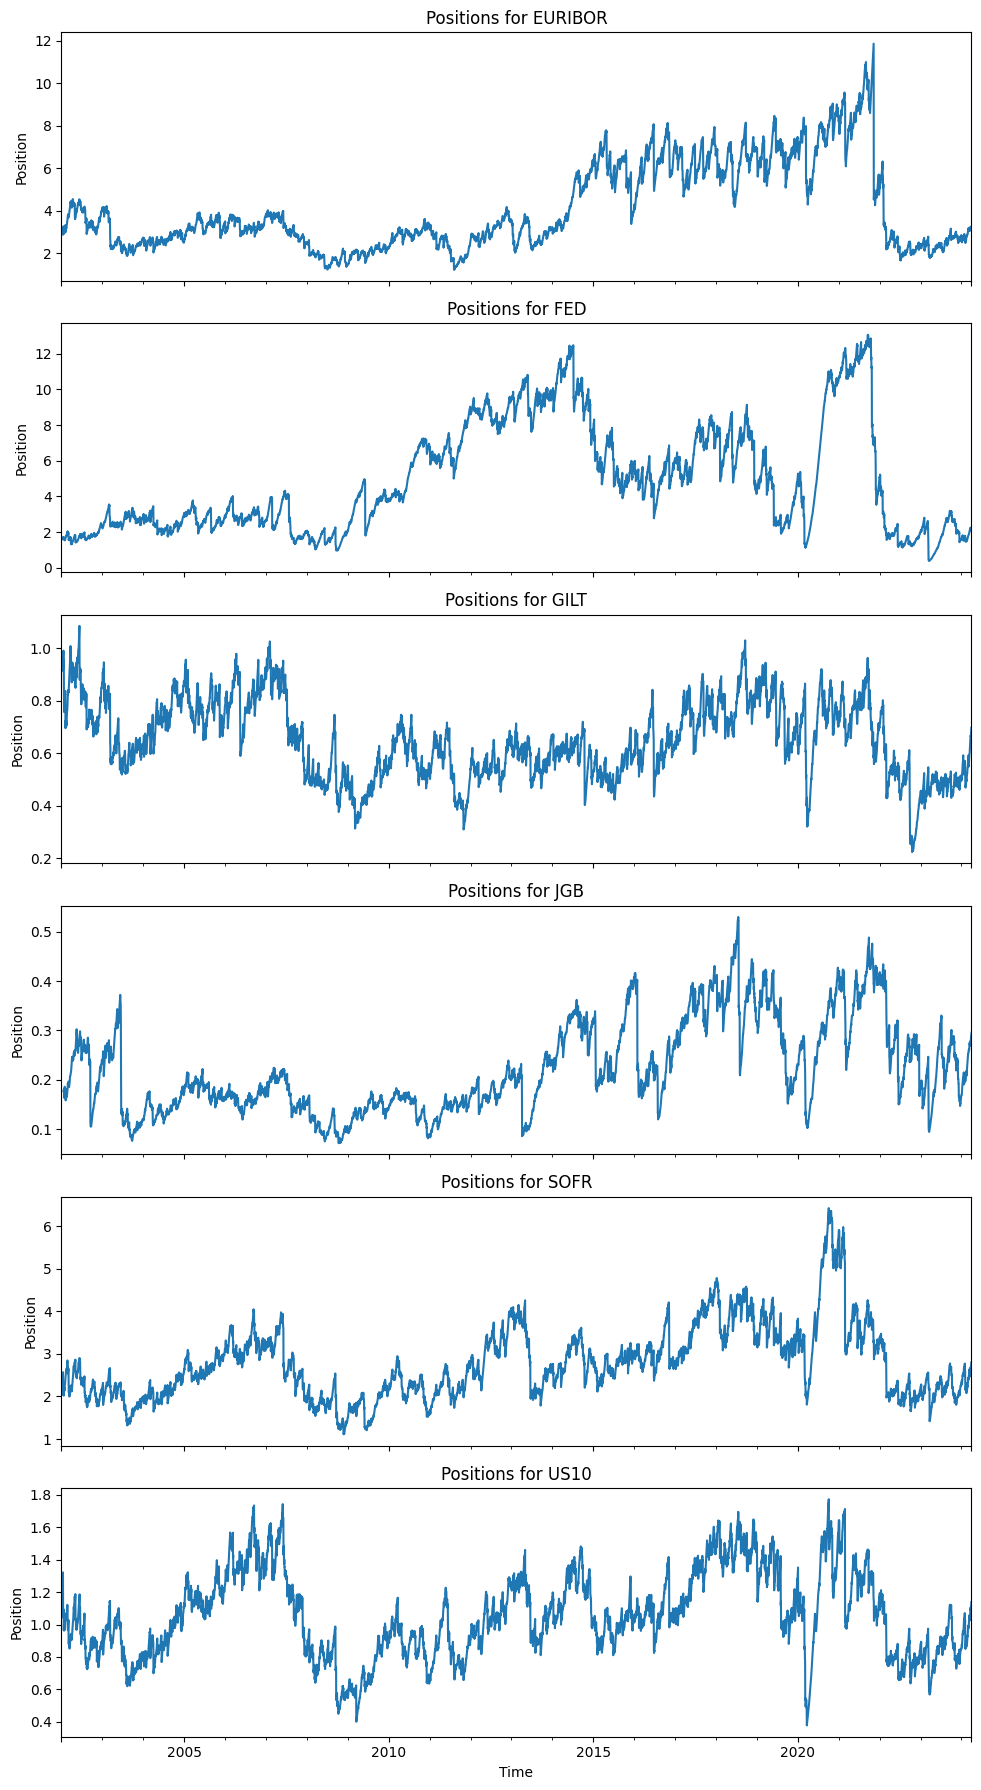

In [5]:
# Plot positions for each instrument

import matplotlib.pyplot as plt
import pandas as pd

# Get all instruments
instruments = my_system.get_instrument_list()

# Create a figure with subplots
fig, axes = plt.subplots(len(instruments), 1, figsize=(10, 3*len(instruments)), sharex=True)

# Plot each instrument's position
for i, instrument in enumerate(instruments):
    position = my_system.portfolio.get_notional_position(instrument)
    position.plot(ax=axes[i])
    axes[i].set_title(f'Positions for {instrument}')
    axes[i].set_ylabel('Position')

# Set common x-label
plt.xlabel('Time')
plt.tight_layout()